In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.corpus import stopwords

1. Definir el corpus

In [2]:
corpus = [
    "Students learn from teachers using books and technology every single day",
    "Teachers explain lessons clearly to help students understand complex school topics",
    "Technology helps students and teachers work together using digital tools effectively",
    "The school encourages students to improve their skills by daily practice",
    "Books and technology support students and teachers in learning and teaching",
    "Teachers prepare lessons and projects to help students perform better daily",
    "Students work in teams to complete projects assigned by their teachers",
    "The school provides resources to support teachers and improve student learning",
    "Technology tools allow teachers and students to collaborate on important tasks",
    "Teachers use books and examples to teach lessons clearly to students",
    "Students study hard to understand lessons and succeed in their school projects",
    "Teachers and students focus on improving performance by using available tools",
    "The school promotes teamwork, learning, and teaching through technology and books"
]

2. Generar la matriz Término-Documento

In [3]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(corpus).toarray()
X = X / np.linalg.norm(X, axis=1, keepdims=True)  # Normalización fila por fila
vocab = vectorizer.get_feature_names_out()

# Mostrar la matriz Término-Documento
print("Vocabulario:")
print(vocab)
print("\nMatriz Término-Documento (X):")
print(X)

Vocabulario:
['allow' 'and' 'assigned' 'available' 'better' 'books' 'by' 'clearly'
 'collaborate' 'complete' 'complex' 'daily' 'day' 'digital' 'effectively'
 'encourages' 'every' 'examples' 'explain' 'focus' 'from' 'hard' 'help'
 'helps' 'important' 'improve' 'improving' 'in' 'learn' 'learning'
 'lessons' 'on' 'perform' 'performance' 'practice' 'prepare' 'projects'
 'promotes' 'provides' 'resources' 'school' 'single' 'skills' 'student'
 'students' 'study' 'succeed' 'support' 'tasks' 'teach' 'teachers'
 'teaching' 'teams' 'teamwork' 'technology' 'the' 'their' 'through' 'to'
 'together' 'tools' 'topics' 'understand' 'use' 'using' 'work']

Matriz Término-Documento (X):
[[0.         0.30151134 0.         0.         0.         0.30151134
  0.         0.         0.         0.         0.         0.
  0.30151134 0.         0.         0.         0.30151134 0.
  0.         0.         0.30151134 0.         0.         0.
  0.         0.         0.         0.         0.30151134 0.
  0.         0.  

2.1. Calcular las Dimensiones de X

In [5]:
N, d_model = X.shape  # Número de documentos y tamaño del vocabulario
num_heads = 7  # Dividir en 3 cabezas
d_k = d_model // num_heads  # Dimensión por cabeza (para simplificar)
d_k

9

Dimensiones clave:
X: (N, d_model), donde N = número de documentos, d_model = tamaño del vocabulario
vocab: (d_model,), contiene los términos únicos del vocabulario

3. Crear las matrices entrenables (W_Q, W_K, W_V)

In [6]:
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_k)
W_K = np.random.rand(d_model, d_k)
W_V = np.random.rand(d_model, d_k)
W_Q

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985, 0.83244264, 0.21233911,
        0.18182497, 0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289, 0.13949386, 0.29214465,
        0.36636184, 0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041, 0.60754485, 0.17052412,
        0.06505159, 0.94888554, 0.96563203, 0.80839735],
       [0.30461377, 0.09767211, 0.68423303, 0.44015249, 0.12203823,
        0.49517691, 0.03438852, 0.9093204 , 0.25877998],
       [0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
        0.96958463, 0.77513282, 0.93949894, 0.89482735],
       [0.59789998, 0.92187424, 0.0884925 , 0.19598286, 0.04522729,
        0.32533033, 0.38867729, 0.27134903, 0.82873751],
       [0.35675333, 0.28093451, 0.54269608, 0.14092422, 0.80219698,
        0.07455064, 0.98688694, 0.77224477, 0.19871568],


4. Calcular Q, K, V

In [7]:
Q = np.dot(X, W_Q)
K = np.dot(X, W_K)
V = np.dot(X, W_V)
Q

array([[1.49968045, 0.95647993, 1.84504522, 1.92395663, 1.32200272,
        2.00828328, 1.6562233 , 1.70776241, 1.51043091],
       [2.20930161, 2.03014264, 2.08971809, 1.80151902, 1.45775623,
        1.53795547, 1.58093302, 1.88111835, 1.05866945],
       [1.92911572, 1.70431083, 1.57014667, 2.13394752, 1.52614403,
        1.72340205, 0.88221521, 1.41648826, 1.38713597],
       [1.76635395, 1.72180769, 1.73986672, 1.89933131, 1.99602072,
        2.09008497, 1.45483466, 2.06424159, 1.98122037],
       [1.5622197 , 0.4783898 , 1.98895936, 1.96170862, 1.13272535,
        1.57747436, 1.01058888, 1.07154877, 1.36255235],
       [2.21908736, 1.60008303, 1.98129969, 1.66417017, 1.09674858,
        1.75189314, 1.09823099, 1.9246174 , 1.38577653],
       [2.02980868, 1.60662579, 1.60161606, 1.72959458, 1.15262164,
        1.82623136, 1.52150447, 2.03488835, 1.33918183],
       [1.84894327, 1.70711664, 1.6877635 , 2.29612223, 1.99473082,
        1.30213613, 1.44948863, 1.76045959, 1.79716886],


5. Cálculo de la atención

In [8]:
# Producto QK^T
scores = np.dot(Q, K.T)
# Escalar por raíz de d_k
scaled_scores = scores / np.sqrt(d_k)
# Softmax para obtener los pesos
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)
# Ponderar V con los pesos
output = np.dot(attention_weights, V)
attention_weights

array([[0.08754917, 0.14680367, 0.11985887, 0.04591982, 0.01450989,
        0.06281248, 0.12164311, 0.06129309, 0.05577292, 0.03654859,
        0.1716011 , 0.05090969, 0.02477759],
       [0.07604162, 0.17390979, 0.12001245, 0.04388861, 0.0107515 ,
        0.05961826, 0.14683541, 0.0533512 , 0.05743488, 0.03365227,
        0.14942456, 0.0566682 , 0.01841125],
       [0.08333007, 0.16384904, 0.11426323, 0.0451805 , 0.01251865,
        0.06424802, 0.13473316, 0.05600417, 0.06419665, 0.03465078,
        0.14762641, 0.05579081, 0.02360852],
       [0.08658601, 0.17697779, 0.11865537, 0.0395646 , 0.01012299,
        0.06602365, 0.12285233, 0.05712468, 0.05298372, 0.03710878,
        0.1681571 , 0.0452818 , 0.01856119],
       [0.08859418, 0.1324666 , 0.11831425, 0.04670081, 0.01879231,
        0.0651793 , 0.12298544, 0.05485883, 0.06629329, 0.03696183,
        0.15540518, 0.06156735, 0.03188062],
       [0.08637733, 0.17386909, 0.11424512, 0.04342685, 0.01295245,
        0.0624467 , 0.12955

In [9]:
output

array([[1.82986291, 1.50192068, 1.77072419, 1.71226132, 1.18615367,
        1.7405301 , 1.41102204, 1.83790587, 1.9344101 ],
       [1.83876245, 1.49992895, 1.77794608, 1.72972332, 1.19503094,
        1.73770969, 1.4099111 , 1.83133087, 1.93148455],
       [1.83774782, 1.50286169, 1.7753602 , 1.73039436, 1.1941202 ,
        1.74109895, 1.40378406, 1.8394921 , 1.92426552],
       [1.82031972, 1.49430639, 1.77894429, 1.71965965, 1.19744567,
        1.74580257, 1.40398714, 1.82603679, 1.92670197],
       [1.84760823, 1.51174309, 1.76090374, 1.72206942, 1.18241056,
        1.73478016, 1.40300674, 1.85178866, 1.92996991],
       [1.83226694, 1.50235936, 1.77853583, 1.73515184, 1.198962  ,
        1.74195432, 1.39772648, 1.83654894, 1.92034972],
       [1.83135003, 1.50186496, 1.77861685, 1.72870083, 1.19599027,
        1.74113751, 1.40467296, 1.83677463, 1.92496968],
       [1.8431327 , 1.50310711, 1.77411366, 1.72711018, 1.19259244,
        1.73910882, 1.40420131, 1.84154508, 1.93180332],


5. Definir Self-Attention

In [10]:
# Definimos la función softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar desbordamiento numérico
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Función de Self-Attention
def self_attention(Q, K, V):
    d_k = Q.shape[-1]  # Dimensión de las claves (d_k)
    # 1. Producto QK^T (relaciones entre consultas y claves)
    scores = np.dot(Q, K.T)  # Dimensión: (N, N)
    # 2. Escalamiento por sqrt(d_k)
    scaled_scores = scores / np.sqrt(d_k)
    # 3. Aplicar softmax (normalización de las relaciones)
    attention_weights = softmax(scaled_scores)  # Dimensión: (N, N)
    # 4. Multiplicar por V (valores ponderados por atención)
    output = np.dot(attention_weights, V)  # Dimensión: (N, d_k)
    return output, attention_weights

6. Implementar Multi-Head Attention

In [11]:
# Función de Multi-Head Attention
def multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads):
    """
    X: Matriz de entrada (N, d_model)
    W_Q, W_K, W_V: Matrices entrenables para Q, K, V (d_model, d_model)
    W_O: Matriz para la proyección final (d_model, d_model)
    num_heads: Número de cabezas de atención
    """
    N, d_model = X.shape
    assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
    d_k = d_model // num_heads  # Dimensión por cabeza

    # Dividir las matrices de proyección para cada cabeza
    heads_output = []  # Lista para almacenar la salida de cada cabeza
    all_attention_weights = []  # Lista para almacenar los pesos de atención de cada cabeza
    for head in range(num_heads):
        # Proyectar las entradas en Q, K, V para esta cabeza
        Q = np.dot(X, W_Q[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        K = np.dot(X, W_K[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        V = np.dot(X, W_V[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)

        # Calcular Self-Attention para esta cabeza
        head_output, attention_weights = self_attention(Q, K, V)  # Dimensión: (N, d_k)
        heads_output.append(head_output)
        all_attention_weights.append(attention_weights)

    # Concatenar las salidas de todas las cabezas
    concatenated = np.concatenate(heads_output, axis=1)  # Dimensión: (N, d_model)

    # Aplicar proyección final
    output = np.dot(concatenated, W_O[:, :d_model])  # Aseguramos que W_O tenga la forma correcta
    return output, all_attention_weights

7. Visualizar pesos de atención

In [12]:
def visualize_attention(weights, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights, annot=True, cmap="Blues", fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel("Keys (K)")
    plt.ylabel("Queries (Q)")
    plt.show()

8. Definir parámetros entrenables aleatorios para Multi-Head Attention

In [13]:
d_model = X.shape[1]  # Tamaño del vocabulario
num_heads = 6
print(d_model)
print(num_heads)
assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
d_k = d_model // num_heads  # Dimensión por cabeza (d_model dividido entre num_heads)
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_model)  # Proyección para Q
np.random.seed(43)  # Para reproducibilidad
W_K = np.random.rand(d_model, d_model)  # Proyección para K
np.random.seed(44)  # Para reproducibilidad
W_V = np.random.rand(d_model, d_model)  # Proyección para V
np.random.seed(45)  # Para reproducibilidad
W_O = np.random.rand(d_model, d_model)  # Proyección final

66
6


9. Calcular la salida y pesos de atención para Self-Attention

In [14]:
# Proyectar X para generar Q, K, V usando matrices entrenables
Q = np.dot(X, W_Q[:, :d_k])  # Proyección para Q (dimensión: (N, d_k))
K = np.dot(X, W_K[:, :d_k])  # Proyección para K (dimensión: (N, d_k))
V = np.dot(X, W_V[:, :d_k])  # Proyección para V (dimensión: (N, d_k))
self_attention_output, self_attention_weights = self_attention(Q, K, V)

10. Calcular la salida y pesos de atención para Multi-Head Attention

In [15]:
multi_head_output, multi_head_attention_weights = multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads)

11. Mostrar resultados

In [16]:
print("Vocabulario:", vocab)
print("\nSalida de Self-Attention:\n", self_attention_output)
print("\nSalida de Multi-Head Attention:\n", multi_head_output)

Vocabulario: ['allow' 'and' 'assigned' 'available' 'better' 'books' 'by' 'clearly'
 'collaborate' 'complete' 'complex' 'daily' 'day' 'digital' 'effectively'
 'encourages' 'every' 'examples' 'explain' 'focus' 'from' 'hard' 'help'
 'helps' 'important' 'improve' 'improving' 'in' 'learn' 'learning'
 'lessons' 'on' 'perform' 'performance' 'practice' 'prepare' 'projects'
 'promotes' 'provides' 'resources' 'school' 'single' 'skills' 'student'
 'students' 'study' 'succeed' 'support' 'tasks' 'teach' 'teachers'
 'teaching' 'teams' 'teamwork' 'technology' 'the' 'their' 'through' 'to'
 'together' 'tools' 'topics' 'understand' 'use' 'using' 'work']

Salida de Self-Attention:
 [[1.31512916 1.74870177 1.51727524 1.34884022 1.58105241 1.89566723
  1.20668632 1.75824942 1.63158243 1.75783843 1.5125145 ]
 [1.32939155 1.74786508 1.52058685 1.34364847 1.5820191  1.89304862
  1.21410417 1.7695835  1.65456449 1.75859303 1.50575783]
 [1.32163767 1.75028799 1.51779967 1.34379168 1.58403229 1.89514718
  1.2118

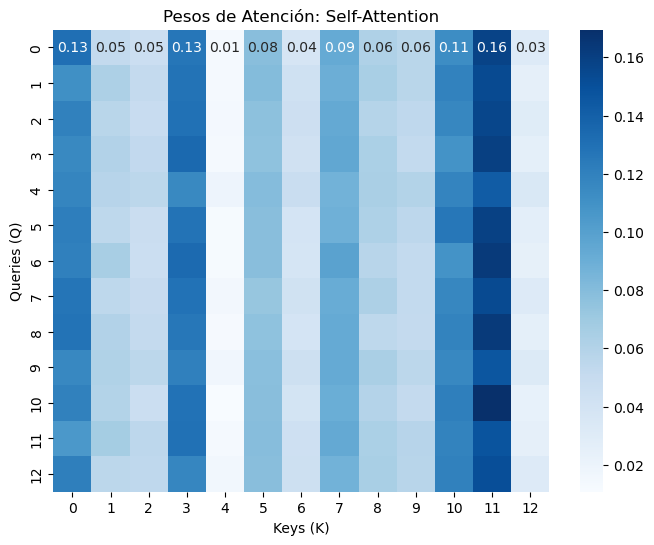

In [17]:
visualize_attention(self_attention_weights, "Pesos de Atención: Self-Attention")

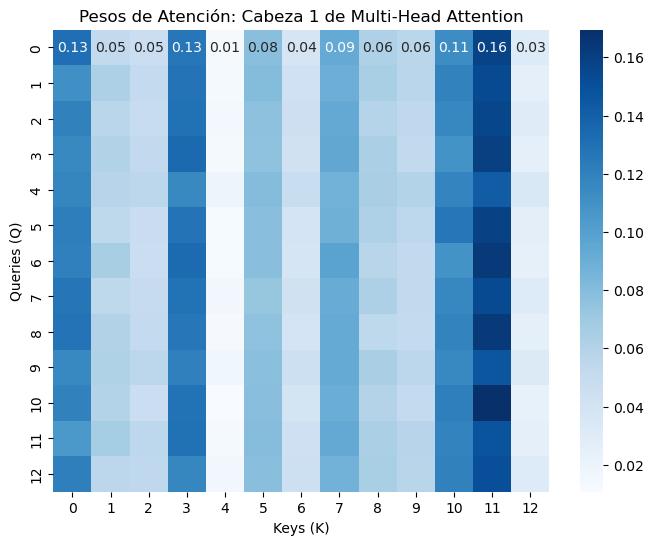

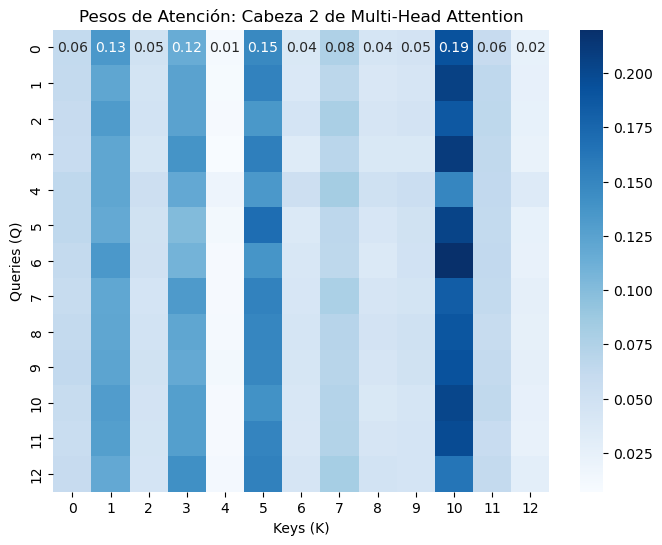

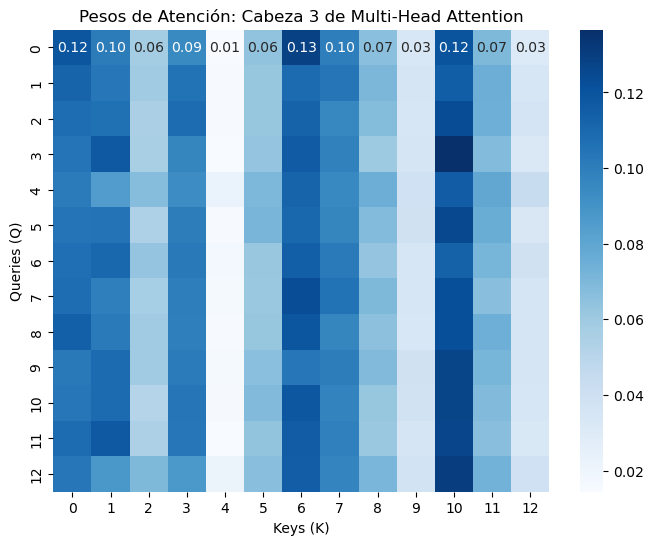

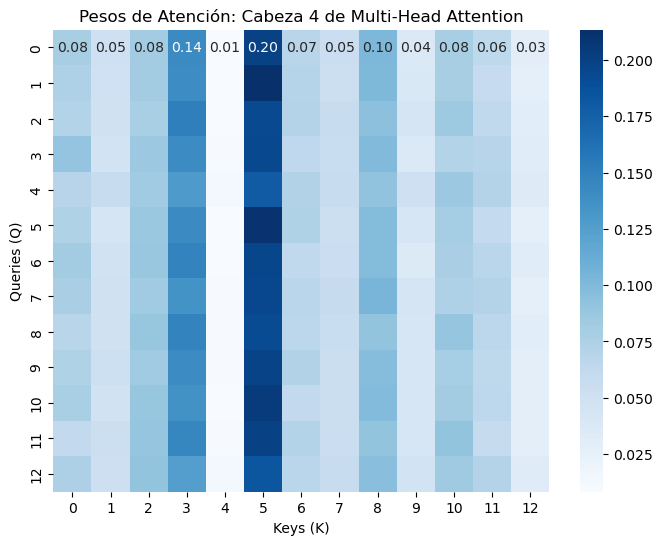

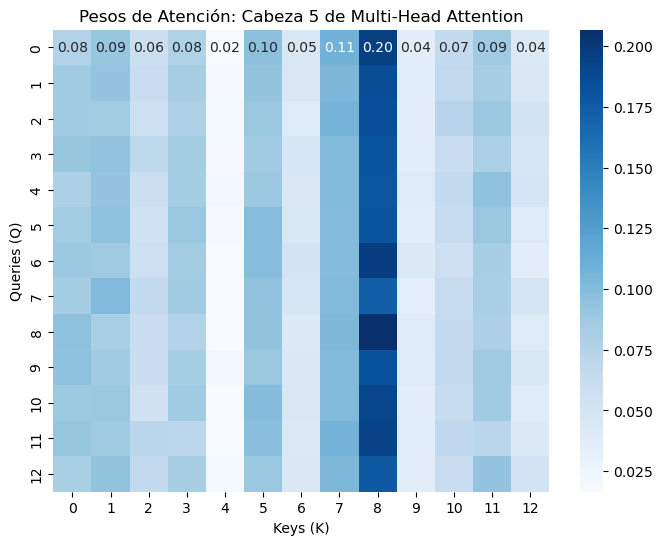

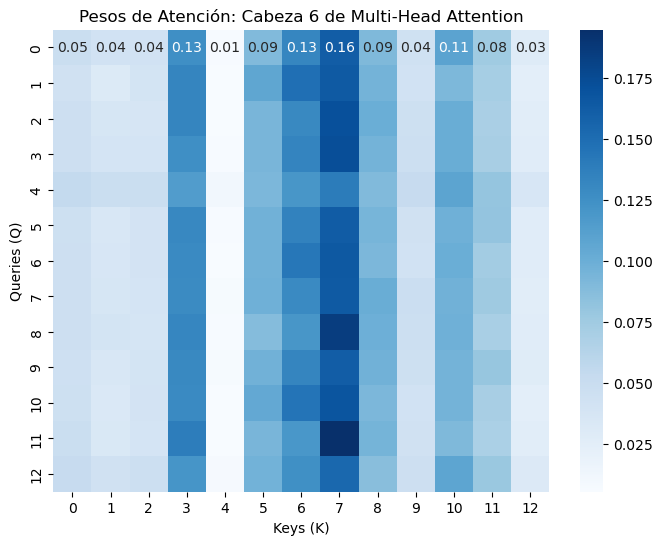

In [18]:
for i, weights in enumerate(multi_head_attention_weights):
    visualize_attention(weights, f"Pesos de Atención: Cabeza {i + 1} de Multi-Head Attention")

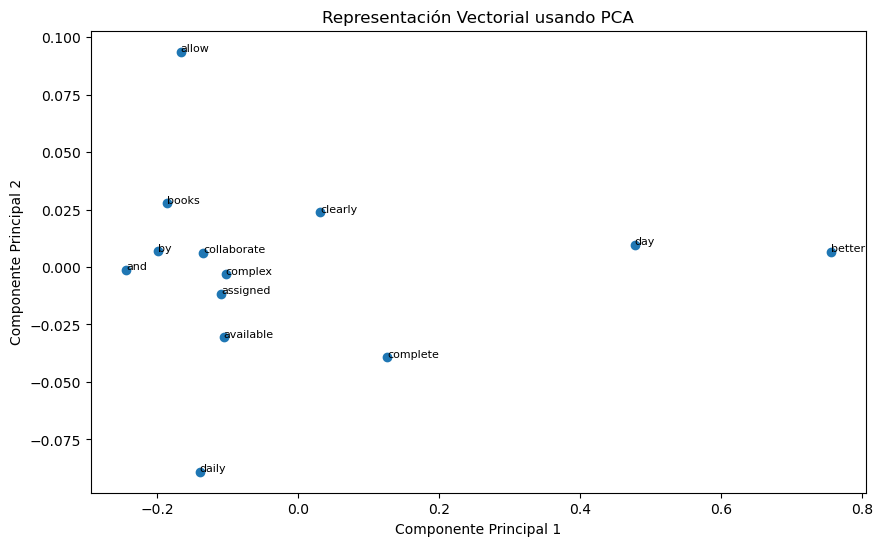

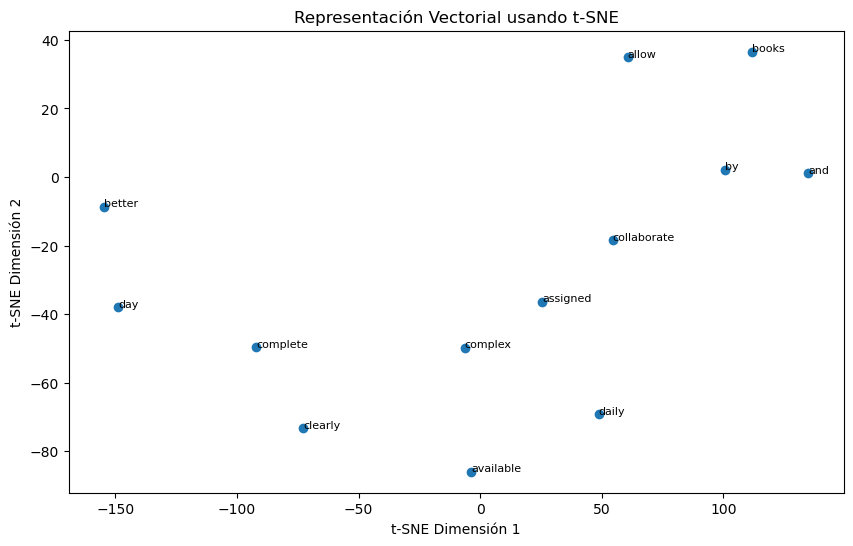

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Seleccionar las representaciones vectoriales de salida
vector_representations = multi_head_output  # Salida de Multi-Head Attention
words = vocab  # El vocabulario obtenido

# Ajustar el tamaño del vocabulario si hay desajuste
num_vectors = vector_representations.shape[0]  # Número de vectores generados
words = words[:num_vectors]  # Recortar vocabulario para que coincida con los vectores

# Visualización usando PCA
pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(vector_representations)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1])
for i in range(len(reduced_pca)):
    plt.text(reduced_pca[i, 0], reduced_pca[i, 1], words[i], fontsize=8)
plt.title("Representación Vectorial usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Visualización usando t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_tsne = tsne.fit_transform(vector_representations)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1])
for i in range(len(reduced_tsne)):
    plt.text(reduced_tsne[i, 0], reduced_tsne[i, 1], words[i], fontsize=8)
plt.title("Representación Vectorial usando t-SNE")
plt.xlabel("t-SNE Dimensión 1")
plt.ylabel("t-SNE Dimensión 2")
plt.show()
